In [10]:
import spacy
import numpy as np
from spacy import displacy
from spacy.scorer import Scorer

def get_entities(annotations):
    annot_list = list()
    for i in range(len(annotations)):
        annot = []
        for j in range(len(annotations[i])):
            label = annotations[i][j][0]
            if(label != "None"): 
                annot.append(annotations[i][j])
        annot_list.append(annot)
    return annot_list
    

#Random state = 10 #Switch to VAL data
nlp1 = spacy.load(R".\spacy_acc\outputhier2\model-best") #load the model
texts_train = np.load("data/full_texts.npy", allow_pickle = True)
ann_train = np.load("data/data_standard.npy", allow_pickle = True)
file_names = np.load("data/file_names_dev.npy", allow_pickle = True)
ann_train = get_entities(ann_train)
val_size = int(0.10 * len(texts_train))
file_names_val = file_names[:val_size]
texts_val, ann_val = texts_train[:val_size], ann_train[:val_size]
index = 363
print(ann_val[index])
print(file_names[index])
#print(texts_test[1][1])
doc = nlp1(str(texts_val[index][1]))
entities = ["Population", "Intervention", "Outcome"]
entitieshier = ['P: Age', 'P: Sex', 'P: Sample size', 
                 'P: Condition', 'I: Surgical', 'I: Physical', 
                 'I: Drug', 'I: Educational', 'I: Psychological', 
                 'I: Other', 'I: Control', 'O: Physical', 'O: Pain', 
                 'O: Mortality', 'O: Adverse effects', 'O: Mental', 'O: Other']
colors = {'Population': '#2FAE9F', 'Intervention': '#2F9C53', 'Outcome': '#E8D35B'}
colorshier = {'P: Age': '#2FAEAF', 'P: Sex': '#2FAEBF', 'P: Sample size': '#2FAECF', 
                 'P: Condition': '#2FAEDF', 'I: Surgical': '#AC143C', 'I: Physical': '#B9143C', 
                 'I: Drug': '#C7143C', 'I: Educational': '#D5143C', 'I: Psychological': '#E3143C', 
                 'I: Other': '#F1143C', 'I: Control': '#FF143C', 'O: Physical': '#32AA32', 
                 'O: Pain': '#32BB32', 'O: Mortality': '#32CC32', 'O: Adverse effects': '#32DD32',
                 'O: Mental': '#32EE32', 'O: Other': '#32FF32'}
options = {"ents": entities, "colors": colors }
optionshier = {"ents": entitieshier, "colors": colorshier }
displacy.render(doc, style="ent", jupyter = True, options = optionshier)

[('I: Surgical', 'limited'), ('I: Surgical', 'palmar'), ('I: Surgical', 'incision'), ('I: Physical', 'traditional'), ('I: Physical', 'open'), ('I: Physical', 'technique'), ('I: Surgical', 'limited'), ('I: Surgical', 'palmar'), ('I: Surgical', 'incision'), ('I: Physical', 'for'), ('I: Surgical', 'carpal'), ('I: Surgical', 'tunnel'), ('I: Surgical', 'release'), ('I: Surgical', '('), ('I: Surgical', 'CTR'), ('I: Surgical', ')'), ('I: Physical', 'traditional'), ('I: Physical', 'open'), ('I: Physical', 'technique'), ('P: Sample size', 'Seventy-two'), ('P: Sample size', 'patients'), ('P: Condition', 'with'), ('P: Condition', 'a'), ('P: Condition', 'carpal'), ('P: Condition', 'tunnel'), ('P: Condition', 'syndrome'), ('P: Condition', 'were'), ('P: Condition', 'individually'), ('P: Condition', 'randomized'), ('P: Condition', 'into'), ('P: Condition', 'the'), ('P: Condition', 'trial'), ('I: Physical', '('), ('I: Surgical', 'limited'), ('I: Surgical', 'incision'), ('I: Surgical', 'CTR'), ('I: Phy

In [2]:
nlp2 = spacy.load(R".\spacy_acc\output\model-best") #load the best model
#print(texts_test[1][1])
doc = nlp2(str(texts_val[index][1]))
displacy.render(doc, style="ent", jupyter = True, options = options)

In [3]:
doc = nlp1("We have compared the efficacy of aspirin in \n comparison  to a placebo in the prevention \n of headaches for children \n aged 8-16 years.")
displacy.render(doc, style="ent", jupyter = True, options = optionshier)

In [4]:
from spacy.tokens import Span
doc1 = nlp1("The efficacy of a intravitreal injection of aflibercept compared with panretinal photocoagulation for the prevention of severe visual loss for 236 patients with diabetic retinopathy aged 18 to 65 years old")
doc2 = nlp1("The efficacy of a intravitreal injection of aflibercept compared with panretinal photocoagulation for the prevention of severe visual loss for 236 patients with diabetic retinopathy aged 18 to 65 years old")
doc3 = nlp1("The efficacy of a intravitreal injection of aflibercept compared with panretinal photocoagulation for the prevention of severe visual loss for 236 patients with diabetic retinopathy aged 18 to 65 years old")
doc1.set_ents([Span(doc1, 4, 5, "I: Drug"), Span(doc1, 7, 8, "I: Drug"), 
               Span(doc1, 10, 11, "I: Surgical"), Span(doc1, 11, 12, "I: Surgical"),
               Span(doc1, 16, 17, "O: Physical"), Span(doc1, 17, 18, "O: Physical"), 
               Span(doc1, 18, 19, "O: Physical"), Span(doc1, 20, 21, "P: Sample Size"),
               Span(doc1, 23, 24, "P: Condition"),  Span(doc1, 24, 25, "P: Condition") , 
               Span(doc1, 26, 27, "P: Age"), Span(doc1, 27, 28, "P: Age"),
               Span(doc1, 28, 29, "P: Age")])
doc2.set_ents([Span(doc2, 4, 5, "I: Drug"), Span(doc2, 5, 6, "I: Drug"), Span(doc2, 6, 7, "I: Drug"),
               Span(doc2, 7, 8, "I: Drug"), 
               Span(doc2, 10, 11, "I: Surgical"), Span(doc2, 11, 12, "I: Surgical"),
               Span(doc2, 16, 17, "O: Physical"), Span(doc2, 17, 18, "O: Physical"), 
               Span(doc2, 18, 19, "O: Physical"), Span(doc2, 20, 21, "P: Sample Size"),
               Span(doc2, 21, 22, "P: Sample Size"),
               Span(doc2, 23, 24, "P: Condition"),  Span(doc2, 24, 25, "P: Condition") , 
               Span(doc2, 26, 27, "P: Age"), Span(doc2, 27, 28, "P: Age"),
               Span(doc2, 28, 29, "P: Age") , 
               Span(doc2, 29, 30, "P: Age"), Span(doc2, 30, 31, "P: Age")])
doc3.set_ents([Span(doc3, 7, 8, "I: Drug"), 
               Span(doc3, 11, 12, "I: Surgical"),
               Span(doc3, 17, 18, "O: Physical"), Span(doc3, 18, 19, "O: Physical"), 
               Span(doc3, 20, 21, "P: Sample Size"),
               Span(doc3, 22, 23, "P: Condition"),  Span(doc3, 23, 24, "P: Condition") , 
               Span(doc3, 26, 27, "P: Age"), Span(doc3, 28, 29, "P: Age") 
               ])
displacy.render(doc1, style="ent", jupyter = True, options = optionshier)
print("\n")
displacy.render(doc2, style="ent", jupyter = True, options = optionshier)
print("\n")
displacy.render(doc3, style="ent", jupyter = True, options = optionshier)
print("\n")

In [22]:
import numpy as np

def get_nr_of_FN(entities_model, entities_groundtruth, texts): #TODO normalize by size
    fn_list = []
    text_lengths = [len(i[1]) for i in texts]
    p = np.percentile(text_lengths, 5) #Get 10th percentile of the array of text lengths
    for i in range(len(entities_model)): 
        if((len(texts[i][1])) > p): #Filter out small abstracts
            fn = 0
            groundtruth_ents = entities_groundtruth[i]
            for entity in groundtruth_ents:
                if(not entity in entities_model[i]):
                    fn += 1
            fn_list.append((i, fn/len(texts[i][1]), text_lengths[i]))
    return fn_list

entities_model = []
entities_groundtruth = []
for ann in ann_val:
    entities_groundtruth.append(ann)
for texts in texts_val:
    doc3 = nlp1(str(texts))
    ents = list(doc3.ents)
    ents = [(ent.label_,ent.text) for ent in ents]
    entities_model.append(ents)
fn_list = get_nr_of_FN(entities_model, entities_groundtruth, texts_val)
fn_list.sort(key=lambda x:x[1], reverse = True)
print(fn_list[:10])
        
    

[(16, 0.06343283582089553, 1340), (363, 0.05930359085963003, 1838), (244, 0.05420054200542006, 1845), (144, 0.05322415557830092, 977), (365, 0.04861111111111111, 1728), (299, 0.047588424437299034, 1555), (320, 0.04602510460251046, 956), (129, 0.04489164086687306, 1938), (300, 0.04223968565815324, 1018), (344, 0.04100719424460432, 1390)]


In [23]:
def get_first_x_documents(fn_list, file_names_val, amount):
    files = []
    for i in range(amount):
        files.append(file_names_val[fn_list[i][0]])
    return files
       
def render_first_x_documents(fn_list, file_names, amount, texts_val): 
    for i in range(amount):
        print(file_names[i])
        index = fn_list[i][0]
        doc_ren = nlp1(str(texts_val[index][1]))
        displacy.render(doc_ren, style="ent", jupyter = True, options = optionshier)
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:50% !important; }</style>"))  
file_names = get_first_x_documents(fn_list, file_names_val, 10) 
render_first_x_documents(fn_list, file_names, 10, texts_val)



10148879.txt


11828556.txt


11210885.txt


10755175.txt


11835021.txt


11450816.txt


11550726.txt


10693733.txt


11450818.txt


11746070.txt


C:\Users\lukev\anaconda\envs\spacy\lib\site-packages\spacy\training\iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "Cyclosporine inhibition of P-glycoprotein in chron..." with entities "[(0, 12, 'I: Drug'), (45, 52, 'P: Condition'), (53...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\lukev\anaconda\envs\spacy\lib\site-packages\spacy\training\iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "[Local treatment of periarthropathies with the 5-H..." with entities "[(20, 37, 'P: Condition'), (47, 72, 'I: Drug'), (7...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\lukev\anaconda\envs\spacy\lib\site-packages\spacy\training\iob_utils.py:141: UserWarn

C:\Users\lukev\anaconda\envs\spacy\lib\site-packages\spacy\training\iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "[Clinical study on dan shao tang in treating IgA n..." with entities "[(19, 22, 'I: Drug'), (23, 27, 'I: Drug'), (28, 32...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\lukev\anaconda\envs\spacy\lib\site-packages\spacy\training\iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "Comparison of quality of life, work productivity a..." with entities "[(14, 21, 'O: Other'), (22, 24, 'O: Other'), (25, ...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\lukev\anaconda\envs\spacy\lib\site-packages\spacy\training\iob_utils.py:141: UserWarn

array([[    0,     0,    24,     0,     0,     0,     0,     0,    87,
            0,     0,     0,     0,     0,     2,     1,     3,     0,
            0],
       [    0,   363,   117,     5,     0,    10,     0,     0,   251,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,    22,  4172,     0,     0,    24,     0,    10,  1011,
            0,     0,     0,     0,     0,     8,     0,     0,     0,
            0],
       [    0,     3,    19,   276,     0,    11,     0,     1,   657,
            0,     0,     5,     0,     0,     8,     7,     3,     0,
            0],
       [    0,     0,    46,     5,     0,    55,     0,     0,   143,
            0,     0,     0,     0,     0,     0,     0,     1,     0,
            0],
       [    0,     5,   160,    26,     0,   579,     0,    41,   855,
            0,     0,     0,     0,     0,    28,     0,     8,     0,
            0],
       [    0,     3,    37,    29,     0,    30,   

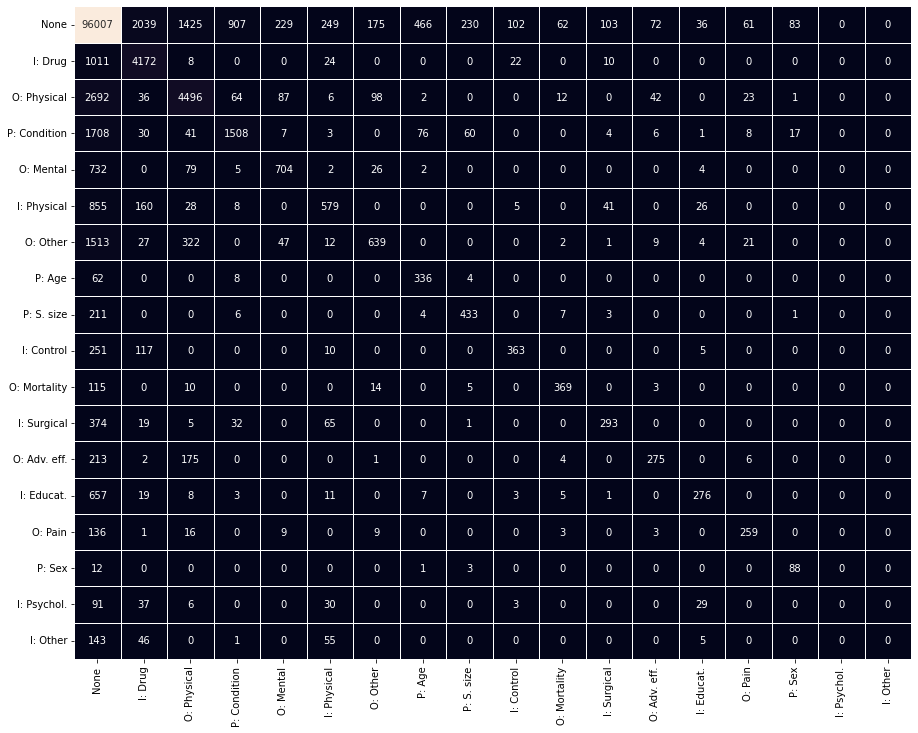

C:\Users\lukev\anaconda\envs\spacy\lib\site-packages\spacy\training\iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "Cyclosporine inhibition of P-glycoprotein in chron..." with entities "[(0, 12, 'I: Drug'), (45, 52, 'P: Condition'), (53...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\lukev\anaconda\envs\spacy\lib\site-packages\spacy\training\iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "[Local treatment of periarthropathies with the 5-H..." with entities "[(20, 37, 'P: Condition'), (47, 72, 'I: Drug'), (7...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\lukev\anaconda\envs\spacy\lib\site-packages\spacy\training\iob_utils.py:141: UserWarn

C:\Users\lukev\anaconda\envs\spacy\lib\site-packages\spacy\training\iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "Effects of pioglitazone and glimepiride on glycemi..." with entities "[(11, 23, 'I: Drug'), (28, 39, 'I: Drug'), (87, 94...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\lukev\anaconda\envs\spacy\lib\site-packages\spacy\training\iob_utils.py:141: UserWarning: [W030] Some entities could not be aligned in the text "Once-daily versus twice-daily lamivudine, in combi..." with entities "[(30, 40, 'I: Drug'), (40, 41, 'I: Drug'), (42, 44...". Use `spacy.training.offsets_to_biluo_tags(nlp.make_doc(text), entities)` to check the alignment. Misaligned entities ('-') will be ignored during training.
  warnings.warn(
C:\Users\lukev\anaconda\envs\spacy\lib\site-packages\spacy\training\iob_utils.py:141: UserWarn

array([[    0,     0,    24,     0,     0,     0,     0,     0,    87,
            0,     0,     0,     0,     0,     2,     1,     3,     0,
            0],
       [    0,   363,   117,     5,     0,    10,     0,     0,   251,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,    22,  4172,     0,     0,    24,     0,    10,  1011,
            0,     0,     0,     0,     0,     8,     0,     0,     0,
            0],
       [    0,     3,    19,   276,     0,    11,     0,     1,   657,
            0,     0,     5,     0,     0,     8,     7,     3,     0,
            0],
       [    0,     0,    46,     5,     0,    55,     0,     0,   143,
            0,     0,     0,     0,     0,     0,     0,     1,     0,
            0],
       [    0,     5,   160,    26,     0,   579,     0,    41,   855,
            0,     0,     0,     0,     0,    28,     0,     8,     0,
            0],
       [    0,     3,    37,    29,     0,    30,   

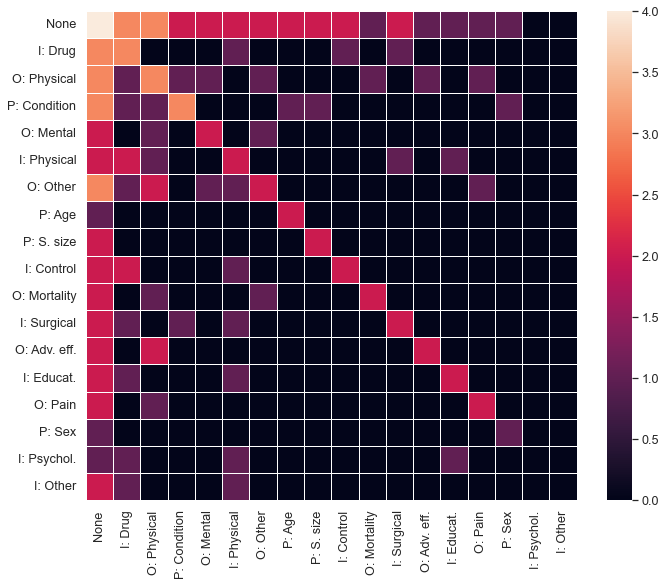